# BEE 4750 Homework 1: Introduction to Using Julia

**Name**: David Diao

**ID**: ZD46

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [64]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/Desktop/BEE 4750/HW/HW 1/hw1-Davivivivivid`


Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [65]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings

In [66]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [67]:
function minimum(array)
    min_value = array[1]
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


The Syntax error is min_value should not be defined = 0. that will result in min_value = 0 and always return this as long as array is positive. So now define the min_value as first element of the array. 

#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [68]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end
average_grade = class_average(student_grades)
@show average_grade;

average_grade = 94.4


The Error code said UndefVarError. Average_grade is not defined. Since average_grade is only in the function. After define the function, call it and store it out side of the funciton to show it. 

#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

In [69]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = falses(n_trials)
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11) 
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

win_prob = 0.382


The error said int64 and bool. So it means it is true and false condition. But the fucntion originally use zero(function) which is for numerical answers. So that is the problem. The code need to match each other on the method.

### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [70]:
function unique(values)
    y = [] # start a new array to store information
    for v in values #Iterate element in input array
        if !(v in y) # check if the element is in the array or not. 
            append!(y, v) # if element does not exist, add it in the array. 
        end
    end
    return y #return the new array with unique elements.
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


The purpose of mystery_function is to find all kinds of thing in the array and put them in a new array. if it is a new value, it will be added into new array. 
The built-in Julia function is unique. I have replaced it in already.

**In this problem**:

-   Explain the purpose of `mystery_function`.
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.

### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.

### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

In [71]:
# Question 3
function compute_mean(v) # cumpute mean function
    sum = 0.0  
    n = length(v) # know the length of array

    
    for i in 1:n #for loop 
        sum += v[i]
    end
    
    return sum / n # computation for mean
end
Random_vect=rand(10) # random vect with length of 10
mean_value=compute_mean(Random_vect)  #compute_mean function for mean of the random vect
Subtracted_vect=Random_vect .- mean_value #Broadcasting to Subtract
@show compute_mean(Subtracted_vect) # show result


compute_mean(Subtracted_vect) = 4.4408920985006264e-17


4.4408920985006264e-17

For question 3: I do not know why I can not get eaxtly 0.0 but I feels like the result I got is small enough to be called close to 0.

Question 4:  Math Model: x=waste water quantity. Eff means waste is going out. Eff_land : 0.2*x_1 Eff_chem : 0.005*x_2 Cost_Land: (x1^2)/20 Cost_chem: 1.5*x_2. Total waste= 0.2*x_1+0.005*x_2 we want total waste to be <= 20



Total YUK Eff: 10.25 kg/day
Total cost: 200.0 dollar per day
X1: 0, X2: 100, YUK: 0.5, Cost: 150.0
X1: 10, X2: 90, YUK: 2.45, Cost: 140.0
X1: 20, X2: 80, YUK: 4.4, Cost: 140.0
X1: 30, X2: 70, YUK: 6.35, Cost: 150.0
X1: 40, X2: 60, YUK: 8.3, Cost: 170.0
X1: 50, X2: 50, YUK: 10.25, Cost: 200.0
X1: 60, X2: 40, YUK: 12.2, Cost: 240.0
X1: 70, X2: 30, YUK: 14.15, Cost: 290.0
X1: 80, X2: 20, YUK: 16.1, Cost: 350.0
X1: 90, X2: 10, YUK: 18.05, Cost: 420.0
X1: 100, X2: 0, YUK: 20.0, Cost: 500.0


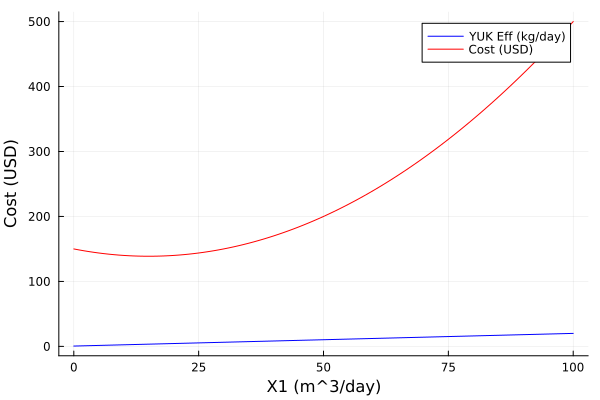

In [72]:
#Math model and equation
function wastewater_allocation(X1, X2)
    yuk_land = 0.2 * X1 #Eff for Land
    yuk_chem = 0.005 * X2 #Eff for Chem
    yuk_total = yuk_land + yuk_chem # total 
    cost_land = X1^2 / 20 # cost for land
    cost_chem = 1.5 * X2 # cost for chem
    cost_total = cost_land + cost_chem # total cost
    
    return yuk_total, cost_total
end

yuk, cost = wastewater_allocation(50, 50) # test with X1&X2 = 50 

println("Total YUK Eff: $yuk kg/day")
println("Total cost: $cost dollar per day")

for X1 in 0:10:100 # try it with gap of 10 in land
    X2 = 100 - X1  # same for chem but waste is limited
    yuk, cost = wastewater_allocation(X1, X2)
    
    if yuk <= 20  # only print what is qualified. 
        println("X1: $X1, X2: $X2, YUK: $yuk, Cost: $cost")
    end
end

plot(X1_values, yuk_values, label="YUK Eff (kg/day)", xlabel="X1 (m^3/day)", ylabel="YUK Eff (kg/day)", color=:blue) # plot eff

plot!(X1_values, cost_values, label="Cost (USD)", ylabel="Cost (USD)", legend=:topright, color=:red) # plot cost


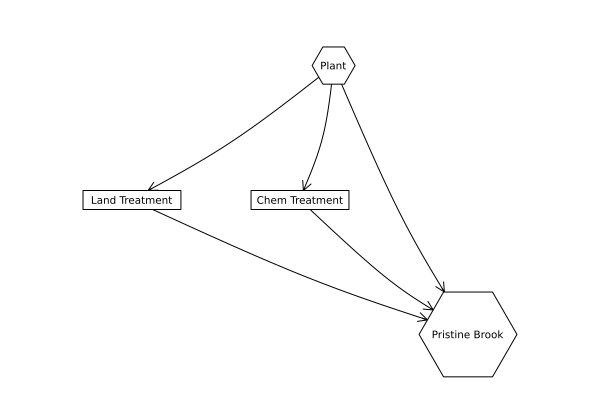

In [73]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => "", (1,3) => "", (1, 4) => "",(2, 4) => "",(3, 4) => "")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.

-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?
    
Question 4: I found some result that works. the cost is 150 dollars. Land treatment is less expensive but results in increased YUK emissions, while chemical treatment is effective in reducing YUK concentrations but is more expensive. A balance must be struck between the two approaches to meet the regulatory limit of 20 kg/day YUK emissions. Relying solely on land treatment would result in excessively high YUK emissions, while too much chemical treatment would increase costs. We need to find the balance point and a better more continuous graph to find the solution.
### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

## References

List any external references consulted, including classmates.

https://blog.glcs.io/broadcasting#heading-what-is-broadcasting 
https://docs.julialang.org/en/v1/manual/control-flow/
https://www.techtarget.com/whatis/definition/Boolean
https://stackoverflow.com/questions/44393145/best-way-to-subtract-vector-from-matrix-in-julia
https://www.geeksforgeeks.org/mathematical-operations-on-arrays-in-julia/
https://docs.julialang.org/en/v1/manual/integers-and-floating-point-numbers/
